Este notebook apresenta uma análise da relação entre a quantidade de dados disponíveis para treinamento, com cada iteração tendo um ano a menos de dados (de um certo ano até 2023), e o montante final obtido no período de backteste.

In [1]:
from labeling import *
from tradingUtils import *
from backtesting_process import *
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
datas = [prio_data, tsla_data, viva_data, azul_data]
datas_str = ["PRIO3", "TSLA", "VIVA3", "AZUL4"]

full_equities = {}

for data, data_str in zip(datas, datas_str):
    equities = {}
    min_year = data.index.year.min()
    start_years = range(min_year, 2024)

    for start_year in start_years:
        filtered_data = data[data.index.year >= start_year]
        policy = backtesting_model(filtered_data, True, 2024)[0]

        bt = Backtest(policy, OurStrategy, cash=10000)
        stats = bt.run()
        equity = stats["Equity Final [$]"]

        equities[start_year] = equity

    full_equities[data_str] = equities

              precision    recall  f1-score   support

        -1.0       0.52      0.35      0.42        72
         0.0       0.16      0.53      0.25        30
         1.0       0.50      0.13      0.21        60

    accuracy                           0.30       162
   macro avg       0.39      0.34      0.29       162
weighted avg       0.45      0.30      0.31       162

              precision    recall  f1-score   support

        -1.0       0.53      0.25      0.34        72
         0.0       0.19      0.70      0.30        30
         1.0       0.45      0.15      0.23        60

    accuracy                           0.30       162
   macro avg       0.39      0.37      0.29       162
weighted avg       0.44      0.30      0.29       162

              precision    recall  f1-score   support

        -1.0       0.49      0.28      0.35        72
         0.0       0.15      0.50      0.23        30
         1.0       0.33      0.10      0.15        60

    accuracy        

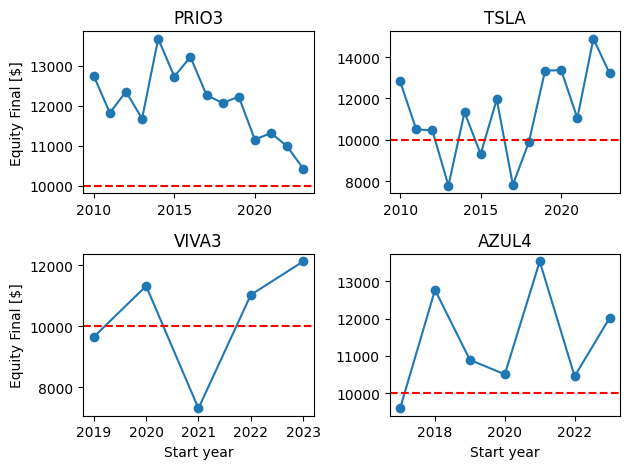

In [14]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(full_equities["PRIO3"].keys(), full_equities["PRIO3"].values(), marker = "o")
axs[0, 0].set_title('PRIO3')
axs[0, 0].set_ylabel('Equity Final [$]')

axs[0, 1].plot(full_equities["TSLA"].keys(), full_equities["TSLA"].values(), marker = "o")
axs[0, 1].set_title('TSLA')

axs[1, 0].plot(full_equities["VIVA3"].keys(), full_equities["VIVA3"].values(), marker = "o")
axs[1, 0].set_title('VIVA3')
axs[1, 0].set_ylabel('Equity Final [$]')
axs[1, 0].set_xlabel('Start year')

axs[1, 1].plot(full_equities["AZUL4"].keys(), full_equities["AZUL4"].values(), marker = "o")
axs[1, 1].set_title('AZUL4')
axs[1, 1].set_xlabel('Start year')

for ax in axs.flat:
    ax.axhline(y = 10_000, color = "red", linestyle = "--")

plt.tight_layout()
plt.show()